In [1]:
from tdc.single_pred import ADME
import numpy as np
import pandas as pd
import seaborn as sns
from tqdm.auto import tqdm
from noiseestimator import NoiseEstimator

In [2]:
data = ADME(name = 'Solubility_AqSolDB')
data.get_data()

Found local copy...
Loading...
Done!


,Drug_ID,Drug,Y
0,"N,N,N-trimethyloctadecan-1-aminium bromide",CCCCCCCCCCCCCCCCCC[N+](C)(C)C.[Br-],-3.616127
1,Benzo[cd]indol-2(1H)-one,O=C1Nc2cccc3cccc1c23,-3.254767
2,4-chlorobenzaldehyde,O=Cc1ccc(Cl)cc1,-2.177078
3,"zinc bis[2-hydroxy-3,5-bis(1-phenylethyl)benzo...",CC(c1ccccc1)c1cc(C(=O)[O-])c(O)c(C(C)c2ccccc2)...,-3.924409
4,4-({4-[bis(oxiran-2-ylmethyl)amino]phenyl}meth...,c1cc(N(CC2CO2)CC2CO2)ccc1Cc1ccc(N(CC2CO2)CC2CO...,-4.662065
...,...,...,...
9977,tetracaine,CCCCNc1ccc(C(=O)OCCN(C)C)cc1,-3.010000
9978,tetracycline,CN(C)[C@@H]1C(O)=C(C(N)=O)C(=O)[C@@]2(O)C(O)=C...,-2.930000
9979,thymol,Cc1ccc(C(C)C)c(O)c1,-2.190000
9980,verapamil,COc1ccc(CCN(C)CCCC(C#N)(c2ccc(OC)c(OC)c2)C(C)C...,-3.980000


In [3]:
# get range of solubility values
solubility = data.y
solubility.to_csv("../data/processed/aqsoldb.csv", index=False)
solubility_range = solubility.max() - solubility.min()
print(f"Solubility range: {solubility_range}")

Solubility range: 15.309581620100001


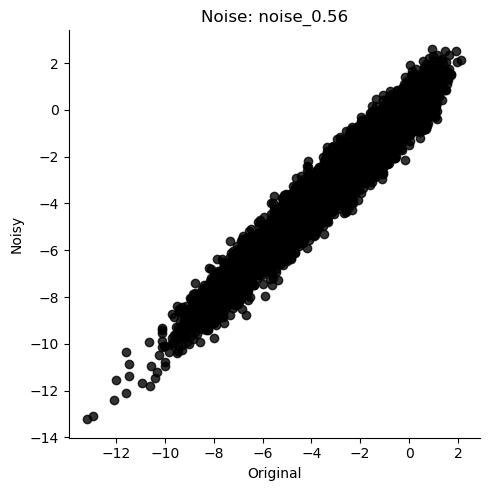

In [4]:
NE = NoiseEstimator(data.y, 0.56)
NE.plot()

<Axes: title={'center': 'mae for different noise levels'}, xlabel='Noise level', ylabel='mae'>

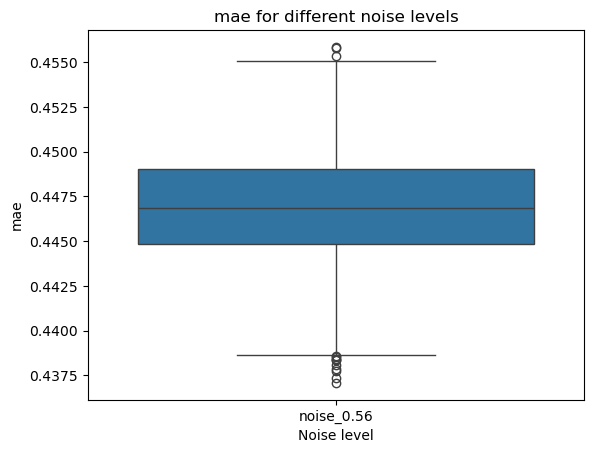

In [5]:
NE.plot_bootstrap(metric='mae')

In [6]:
NE.noise_bootstraps.groupby('noise').mean()

,mae,mse,rmse,r2,pearsonr
noise,,,,,
noise_0.56,0.446859,0.313699,0.560075,0.944058,0.973158


<Axes: title={'center': 'mae for different noise levels'}, xlabel='Noise level', ylabel='mae'>

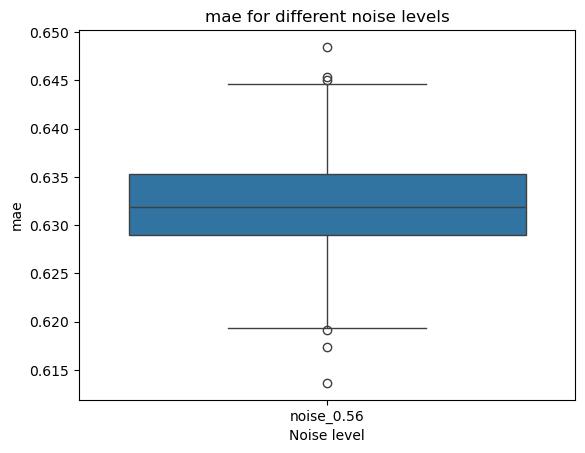

In [7]:
NE = NoiseEstimator(data.y, 0.56, 0.56)
NE.plot_bootstrap(metric='mae')

In [8]:
NE.noise_bootstraps.groupby('noise').mean()

,mae,mse,rmse,r2,pearsonr
noise,,,,,
noise_0.56,0.632079,0.627487,0.792121,0.894026,0.947024


In [9]:
NE.noise_bootstraps.mae.to_csv('../data/interim/solubility_MAE.csv')